In [38]:
import pandas as pd 
import numpy as np 
import matplotlib as plt
import tensorflow as tf
# import data_process
from keras.datasets import imdb
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split

In [39]:
df.head(3)

,시도,시군구,일련번호,소재지,도로명주소,지목,건물용도,대지면적,연면적,건축면적,...,건폐율,동수,층수(지상/지하),용도지역,도로교통,형상지세,주건물구조,사용승인일,주위환경,주택공시가격
0,서울특별시,종로구,1,청운동 4-18,자하문로36길 34,대,단독주택,1193.4,499.24,268.70,...,22.52,1,(2/1),제1종일반주거지역,세로(가),정방형,연와조,1994,고급 주택지대,4655000000
1,서울특별시,종로구,2,청운동 8-3,자하문로35길 5,대,단독주택,924.0,374.15,220.93,...,23.91,1,(2/1),제1종일반주거지역,세로(가),사다리형,연와조 철근콘크리트조(RC조 RS조),1965,일반 주택지대,3134000000
2,서울특별시,종로구,3,청운동 12-9,자하문로36길 11,대,단독주택,237.0,159.74,91.54,...,38.62,1,(2/0),제1종일반주거지역,소로한면,부정형,연와조,1967,고급 주택지대,941000000


In [40]:
df=pd.read_csv('국토교통부_표준주택가격_20210101.csv',encoding='cp949')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230000 entries, 0 to 229999
Data columns (total 22 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   시도         229824 non-null  object 
 1   시군구        228852 non-null  object 
 2   일련번호       230000 non-null  int64  
 3   소재지        230000 non-null  object 
 4   도로명주소      230000 non-null  object 
 5   지목         230000 non-null  object 
 6   건물용도       230000 non-null  object 
 7   대지면적       230000 non-null  float64
 8   연면적        230000 non-null  float64
 9   건축면적       230000 non-null  float64
 10  용적률        230000 non-null  float64
 11  건폐율        230000 non-null  float64
 12  동수         230000 non-null  int64  
 13  층수(지상/지하)  230000 non-null  object 
 14  용도지역       230000 non-null  object 
 15  용도지구       54462 non-null   object 
 16  도로교통       230000 non-null  object 
 17  형상지세       230000 non-null  object 
 18  주건물구조      230000 non-null  object 
 19  사용승인일      230000 non-n

In [41]:
import missingno
plt.rcParams['font.family']='Malgun Gothic'

<AxesSubplot:>

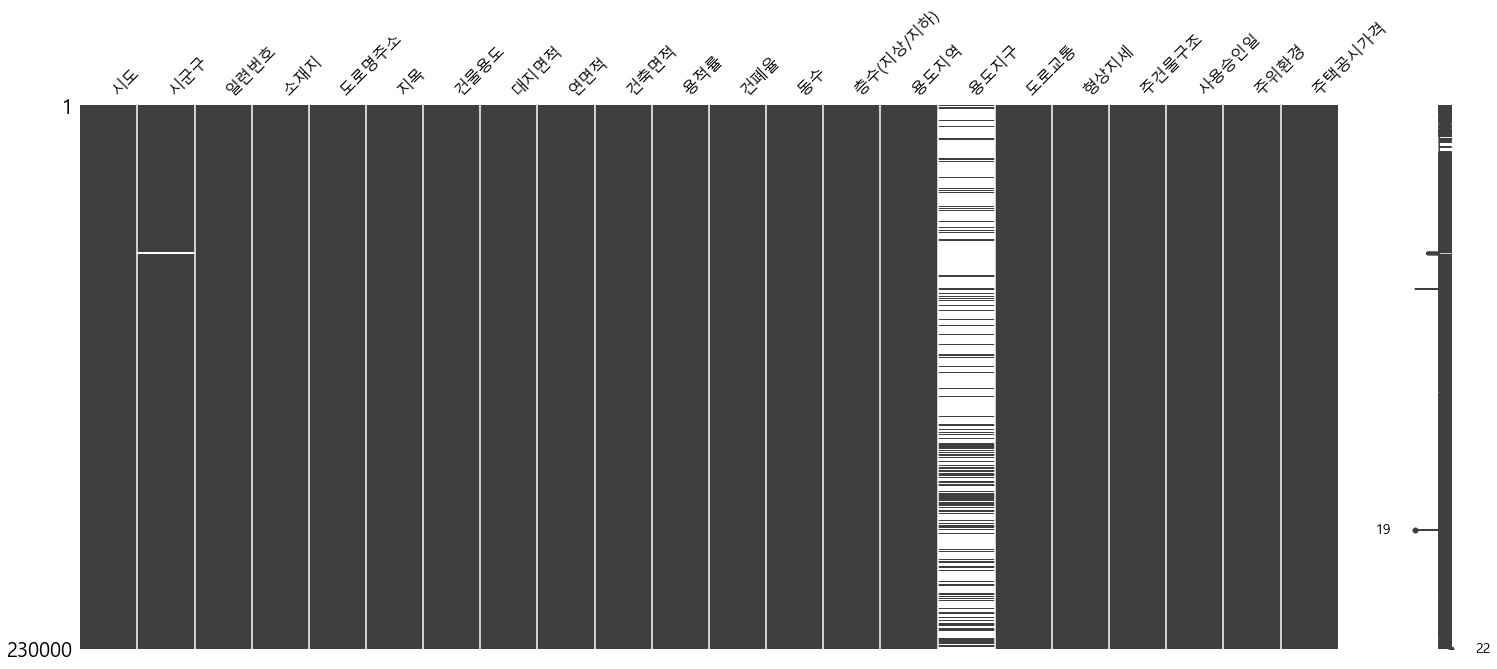

In [42]:
missingno.matrix(df)

In [43]:
df.isnull().sum()

시도              176
시군구            1148
일련번호              0
소재지               0
도로명주소             0
지목                0
건물용도              0
대지면적              0
연면적               0
건축면적              0
용적률               0
건폐율               0
동수                0
층수(지상/지하)         0
용도지역              0
용도지구         175538
도로교통              0
형상지세              0
주건물구조             0
사용승인일             0
주위환경              0
주택공시가격            0
dtype: int64

In [37]:
df.columns

Index(['시도', '시군구', '일련번호', '소재지', '도로명주소', '지목', '건물용도', '대지면적', '연면적',
       '건축면적', '용적률', '건폐율', '동수', '층수(지상/지하)', '용도지역', '도로교통', '형상지세',
       '주건물구조', '사용승인일', '주위환경', '주택공시가격'],
      dtype='object')

## 범주형 변수 드랍

In [50]:
# df.drop(['용도지구','도로명주소','일련번호','형상지세','주건물구조','지목','층수(지상/지하)'],axis=1,inplace=True)
df.head(1)

,시도,시군구,소재지,건물용도,대지면적,연면적,건축면적,용적률,건폐율,동수,층수(지상/지하),용도지역,도로교통,사용승인일,주위환경,주택공시가격
0,서울특별시,종로구,청운동 4-18,단독주택,1193.4,499.24,268.7,32.45,22.52,1,(2/1),제1종일반주거지역,세로(가),1994,고급 주택지대,4655000000


In [51]:
df.drop(['층수(지상/지하)'],axis=1,inplace=True)

In [52]:
# df.isnull().sum()
df.head(3)

,시도,시군구,소재지,건물용도,대지면적,연면적,건축면적,용적률,건폐율,동수,용도지역,도로교통,사용승인일,주위환경,주택공시가격
0,서울특별시,종로구,청운동 4-18,단독주택,1193.4,499.24,268.70,32.45,22.52,1,제1종일반주거지역,세로(가),1994,고급 주택지대,4655000000
1,서울특별시,종로구,청운동 8-3,단독주택,924.0,374.15,220.93,33.00,23.91,1,제1종일반주거지역,세로(가),1965,일반 주택지대,3134000000
2,서울특별시,종로구,청운동 12-9,단독주택,237.0,159.74,91.54,67.40,38.62,1,제1종일반주거지역,소로한면,1967,고급 주택지대,941000000


In [53]:
df['용도지역'].unique()

array(['제1종일반주거지역', '자연녹지지역', '제2종일반주거지역', '제3종일반주거지역', '일반상업지역', '준주거지역',
       '개발제한구역', '제1종전용주거지역', '근린상업지역', '준공업지역', '일반공업지역', '보전녹지지역',
       '중심상업지역', '자연환경보전지역', '생산녹지지역', '제2종전용주거지역', '보전관리지역', '농림지역',
       '계획관리지역', '생산관리지역', '유통상업지역', '용도미지정지역', '전용공업지역', '관리지역'],
      dtype=object)

In [59]:
# pd.get_dummies(df['용도지역'])

pd.get_dummies(data = df, columns = ['용도지역'], prefix = '용도지역')

,시도,시군구,소재지,건물용도,대지면적,연면적,건축면적,용적률,건폐율,동수,...,용도지역_자연환경보전지역,용도지역_전용공업지역,용도지역_제1종일반주거지역,용도지역_제1종전용주거지역,용도지역_제2종일반주거지역,용도지역_제2종전용주거지역,용도지역_제3종일반주거지역,용도지역_준공업지역,용도지역_준주거지역,용도지역_중심상업지역
0,서울특별시,종로구,청운동 4-18,단독주택,1193.4,499.24,268.70,32.45,22.52,1,...,0,0,1,0,0,0,0,0,0,0
1,서울특별시,종로구,청운동 8-3,단독주택,924.0,374.15,220.93,33.00,23.91,1,...,0,0,1,0,0,0,0,0,0,0
2,서울특별시,종로구,청운동 12-9,단독주택,237.0,159.74,91.54,67.40,38.62,1,...,0,0,1,0,0,0,0,0,0,0
3,서울특별시,종로구,청운동 15-10,단독주택,637.5,508.97,189.33,54.42,29.70,2,...,0,0,1,0,0,0,0,0,0,0
4,서울특별시,종로구,청운동 15-26,단독주택,62.8,33.06,33.06,52.64,52.64,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229995,제주특별자치도,서귀포시,표선면 토산리 540,단독주택,577.0,137.88,137.88,23.90,23.90,1,...,0,0,0,0,0,0,0,0,0,0
229996,제주특별자치도,서귀포시,표선면 토산리 936-3,단독주택,410.0,78.45,78.45,19.13,19.13,2,...,0,0,0,0,0,0,0,0,0,0
229997,제주특별자치도,서귀포시,표선면 토산리 1363-4,단독주택,413.0,88.00,88.00,21.31,21.31,2,...,0,0,0,0,0,0,0,0,0,0
229998,제주특별자치도,서귀포시,표선면 토산리 1416-3,단독주택,217.0,78.76,78.76,36.29,36.29,1,...,0,0,0,0,0,0,0,0,0,0


## 쉬었다가 낼 진행

In [16]:
X=df.drop(['주택공시가격'],axis=1)
y=df['주택공시가격']

train_x,test_x,train_y,test_y=train_test_split(X,y,shuffle=True,test_size=0.3)

In [20]:
print('train_x shape:',train_x.shape)
print('train_y shape:',train_y.shape)
print('test_x shape:',test_x.shape)
print('test_y shape:',test_y.shape)

train_x shape: (161000, 21)
train_y shape: (161000,)
test_x shape: (69000, 21)
test_y shape: (69000,)


In [22]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from xgboost.sklearn import XGBRegressor

In [23]:
xgb=XGBRegressor()
xgb.fit(train_x,train_y)
xgb.predict(test_x)

ValueError: DataFrame.dtypes for data must be int, float, bool or categorical.  When
                categorical type is supplied, DMatrix parameter
                `enable_categorical` must be set to `True`.시도, 시군구, 소재지, 도로명주소, 지목, 건물용도, 층수(지상/지하), 용도지역, 용도지구, 도로교통, 형상지세, 주건물구조, 주위환경